# Relatório de Commodities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Ler os dados processados
featured_data = {}
output_dir = "extraction/processed_data"
for metal in os.listdir(output_dir):
    df = pd.read_csv(os.path.join(output_dir, metal))
    df['date'] = pd.to_datetime(df['date'])
    featured_data[metal[:-4]] = df

| Coluna         | O que é                                                                              | Explicação simples                                                                                     |
|----------------|---------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| `metal`        | Nome do metal                                                                        | Indica qual metal aquela linha representa (copper, zinc, nickel, etc.).                                |
| `date`         | Data                                                                                 | Dia da observação no mercado da LME.                                                                   |
| `cash`         | Preço à vista (cash price)                                                           | Quanto custa comprar o metal **para entrega imediata**.                                                |
| `three_month`  | Preço futuro de 3 meses                                                              | Quanto custa comprar o metal **para entrega daqui a 3 meses**.                                         |
| `stock`        | Estoque na LME                                                                       | Quantidade disponível nos armazéns da LME naquele dia (em toneladas).                                  |
| `cash_return`  | Retorno diário do preço à vista                                                      | Variação percentual do `cash` de um dia para o outro.                                                  |
| `vol_30d`      | Volatilidade de 30 dias                                                              | Desvio-padrão dos retornos (`cash_return`) nos últimos 30 dias — mede quão instável o preço está.      |
| `basis`        | Diferença entre futuro e à vista                                                     | `three_month - cash`. Indica **contango** (positivo) ou **backwardation** (negativo).                  |
| `stock_change` | Variação diária do estoque                                                           | Diferença do estoque em relação ao dia anterior (entrada ou retirada de metal no sistema).             |
| `year`         | Ano                                                                                  | Ano extraído da coluna `date`, útil para agregações e comparações anuais.                             |

In [3]:
featured_data['copper']

,metal,date,cash,three_month,stock,cash_return,vol_30d,basis,stock_change,year
0,copper,2008-01-02,666600.0,670600.0,198925.0,NaN,NaN,4000.0,NaN,2008
1,copper,2008-01-03,676500.0,681800.0,198175.0,0.014851,NaN,5300.0,-750.0,2008
2,copper,2008-01-04,699050.0,703500.0,198600.0,0.033333,NaN,4450.0,425.0,2008
3,copper,2008-01-07,691550.0,695050.0,201000.0,-0.010729,NaN,3500.0,2400.0,2008
4,copper,2008-01-08,710600.0,714050.0,200975.0,0.027547,NaN,3450.0,-25.0,2008
...,...,...,...,...,...,...,...,...,...,...
4521,copper,2025-11-17,1079900.0,1080300.0,136050.0,-0.004792,0.010223,400.0,325.0,2025
4522,copper,2025-11-18,1064900.0,1069500.0,140500.0,-0.013890,0.010547,4600.0,4450.0,2025
4523,copper,2025-11-19,1078400.0,1081500.0,157875.0,0.012677,0.010677,3100.0,17375.0,2025
4524,copper,2025-11-20,1078900.0,1080300.0,157925.0,0.000464,0.010444,1400.0,50.0,2025


In [ ]:
# Garantir datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Concatena todos os dataframes para análises agregadas
full_df = pd.concat(featured_data.values(), ignore_index=True)

### a) Visão Geral por Metal

Na visão geral, será analisada a trajetória do preço à vista de cada metal ao longo do tempo. O gráfico permite identificar com clareza períodos de alta, queda e estabilidade. Abaixo, as métricas complementares — preço médio anual, valores máximo e mínimo e a volatilidade — ajudam a quantificar esse comportamento, mostrando o quanto cada mercado é mais estável ou mais sujeito a oscilações. Essa combinação de gráfico e métricas oferece uma leitura rápida sobre o perfil de cada metal, apoiando decisões de planejamento de compras e gestão de risco.

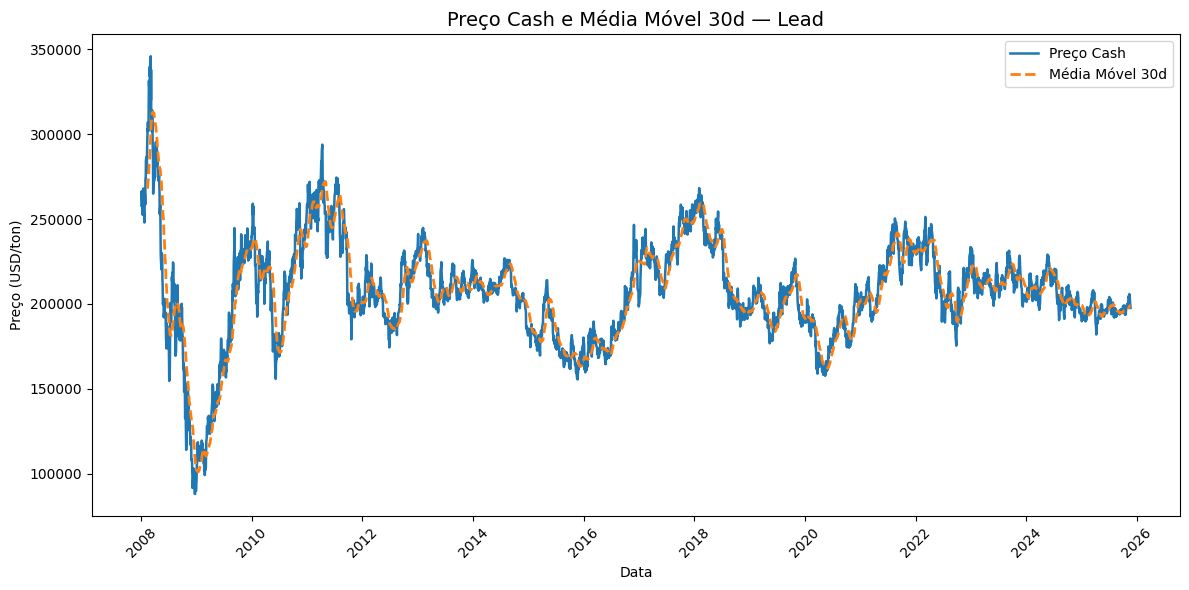

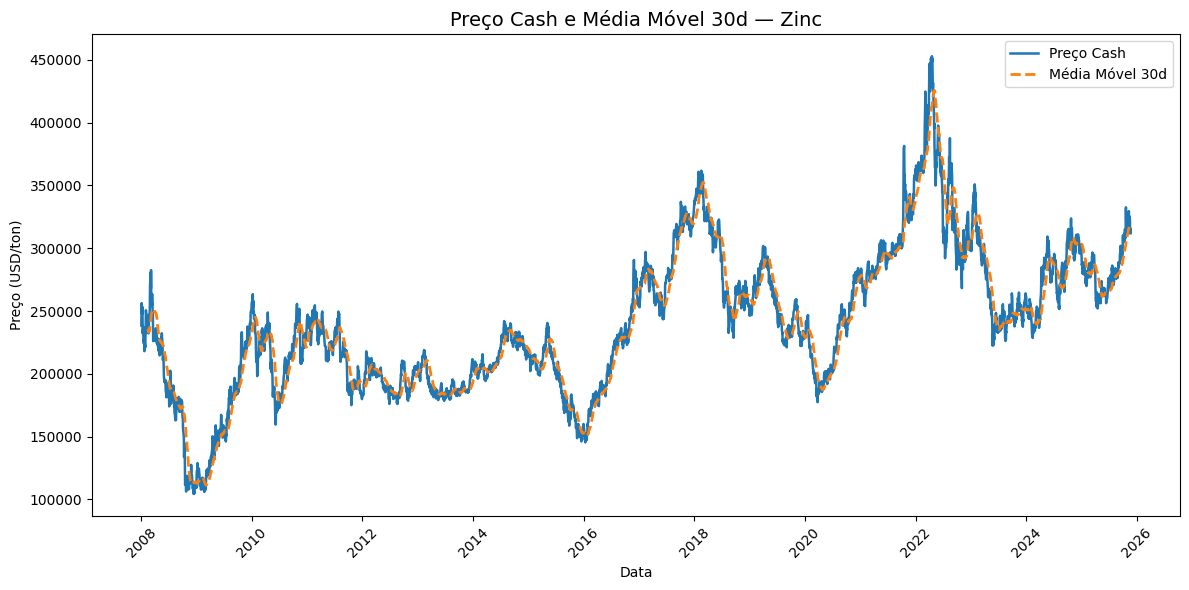

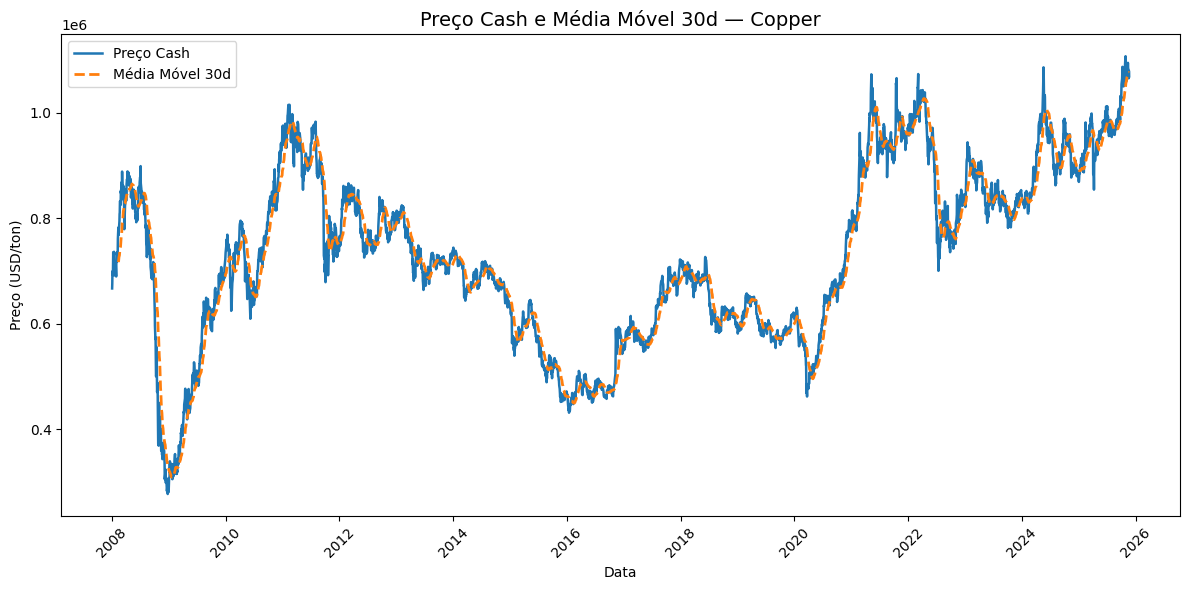

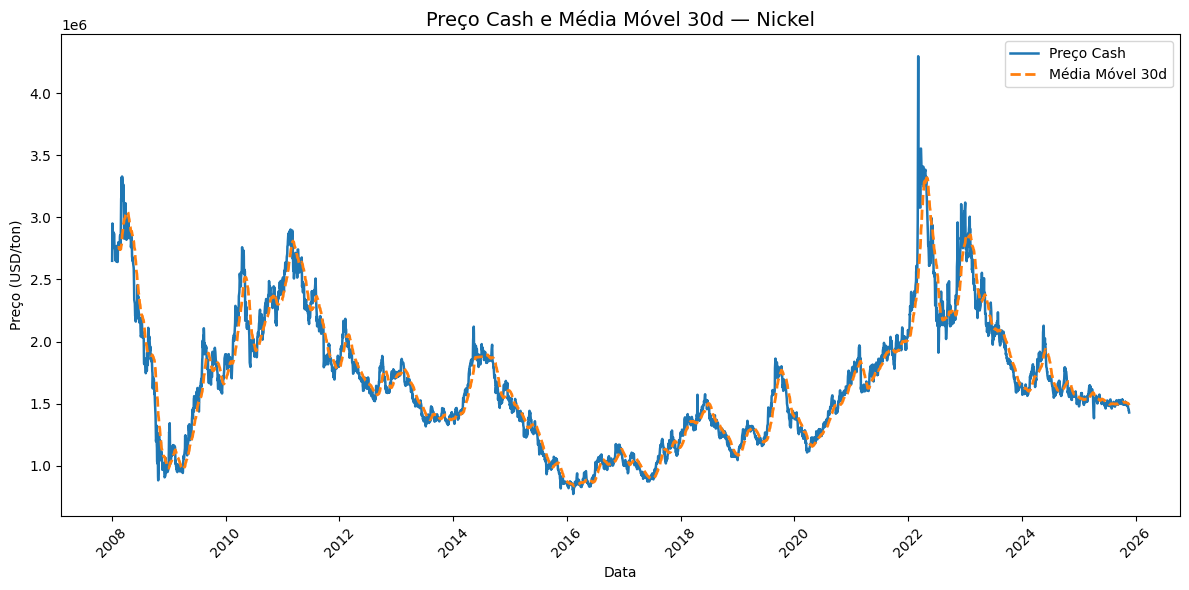

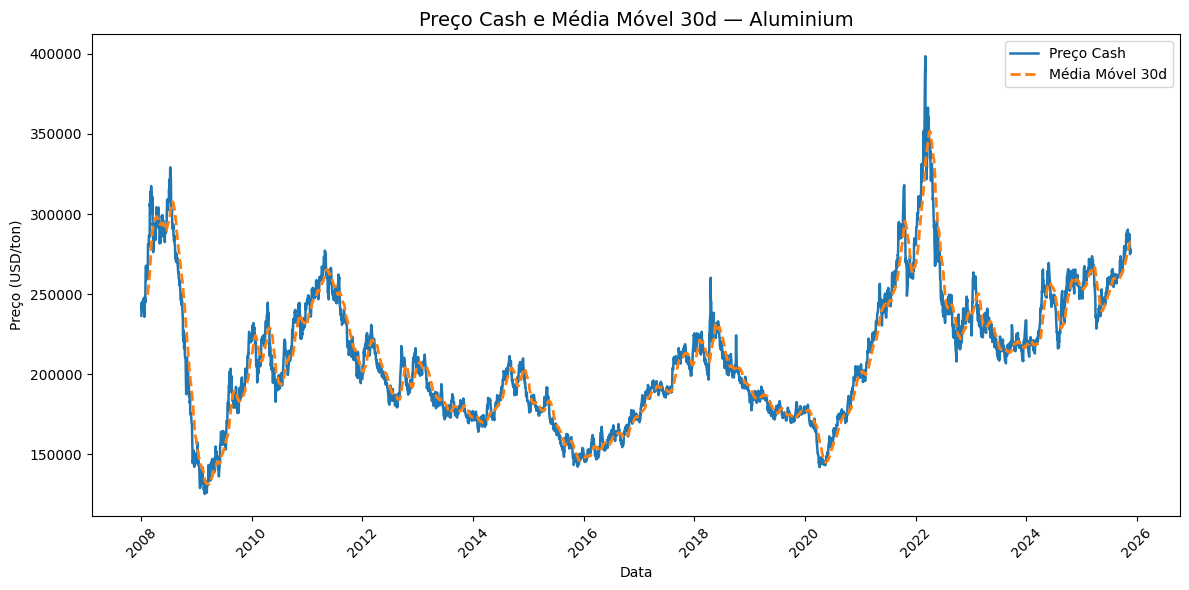

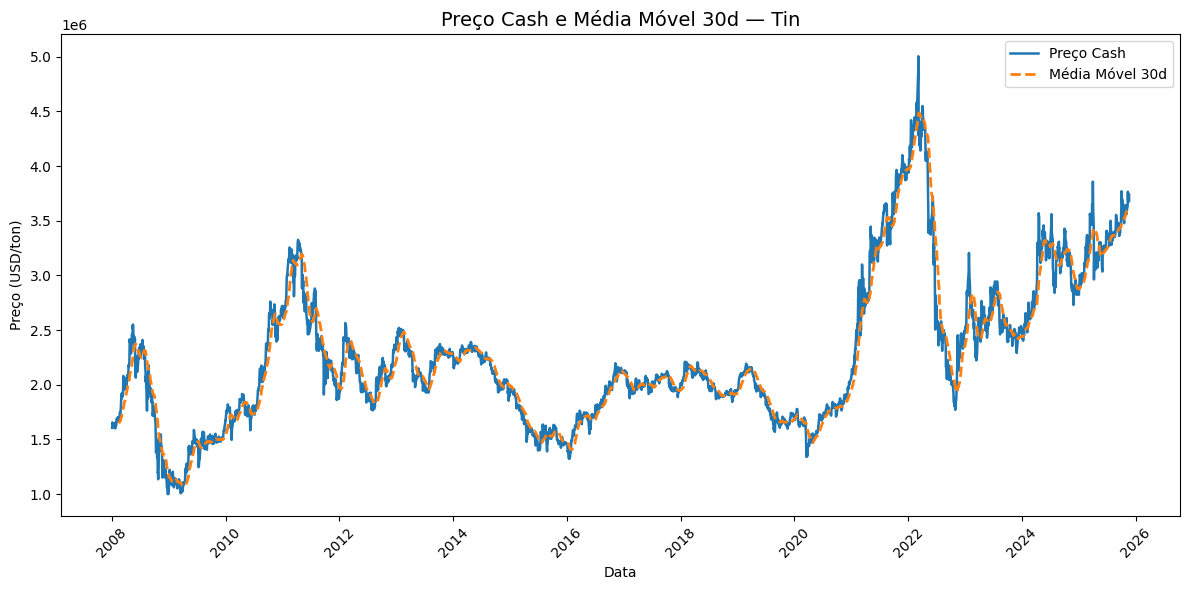

In [ ]:
# Gráfico: Linha de preço cash por metal no tempo (com média móvel 30d)
for metal in featured_data.keys():
    df = featured_data[metal].copy()
    df['cash_ma30'] = df['cash'].rolling(30).mean()
    
    plt.figure(figsize=(12, 6))

    # Linha do preço cash
    sns.lineplot(
        data=df,
        x='date',
        y='cash',
        label='Preço Cash',
        linewidth=1.8
    )

    # Linha da média móvel 30 dias
    sns.lineplot(
        data=df,
        x='date',
        y='cash_ma30',
        label='Média Móvel 30d',
        linestyle='--',
        linewidth=2
    )
    
    plt.title(f'Preço Cash e Média Móvel 30d — {metal.capitalize()}', fontsize=14)
    plt.xlabel("Data")
    plt.ylabel("Preço (USD/ton)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

A análise apresenta a evolução histórica dos preços à vista dos principais metais da LME, suavizados por uma média móvel de 30 dias. Embora pertençam ao mesmo grupo de commodities industriais, os gráficos deixam claro que cada metal segue seu próprio ciclo e reage de maneira distinta a choques econômicos, restrições de oferta e variações de demanda. Observa-se uma queda acentuada em 2008, seguida por recuperações com intensidades diferentes. Entre 2011 e 2019, a maioria dos metais se mantém dentro de faixas estáveis, indicando um período de equilíbrio global. A partir de 2020, todos passam a exibir movimentos mais fortes — tanto de alta quanto de correção — provavelmente impulsionados pela pandemia, problemas logísticos junto a maiores demandas, o que junto com a queda de produção, causa impacto nos preços.

In [ ]:
tabela_metricas = (
    full_df
    .groupby(["metal", "year"])
    .agg(
        preco_medio_ano=("cash", "mean"),
        preco_min=("cash", "min"),
        preco_max=("cash", "max"),
        vol_anual=("cash_return", "std"),  # desvio-padrão dos retornos diários (%)
    )
    .reset_index()
    .sort_values(["metal", "year"])
)

tabela_metricas[tabela_metricas["metal"] == 'copper']

,metal,year,preco_medio_ano,preco_min,preco_max,vol_anual
18,copper,2008,693900.392157,277000.0,898500.0,0.028919
19,copper,2009,516359.486166,305050.0,734600.0,0.024848
20,copper,2010,753932.411067,609100.0,973950.0,0.017190
21,copper,2011,881090.239044,678500.0,1014800.0,0.018223
22,copper,2012,794970.634921,725150.0,865800.0,0.012027
23,copper,2013,732200.000000,663750.0,824250.0,0.011129
24,copper,2014,686141.865079,630600.0,743950.0,0.008317
25,copper,2015,549449.802372,451550.0,644800.0,0.013133
26,copper,2016,486258.695652,431050.0,593550.0,0.013373
27,copper,2017,616597.023810,546600.0,721600.0,0.010301


A tabela consolida, para cada metal e ano, o preço médio, os extremos (mínimo e máximo) e a volatilidade anual dos retornos diários. O preço médio anual indica se o mercado está se mantendo estável, em trajetória de alta ou de queda ao longo do tempo. Os valores mínimo e máximo mostram até onde o preço já foi em cada ciclo, evidenciando anos de maior estresse ou exuberância. Já a volatilidade anual traduz o “tamanho típico” das oscilações diárias — por exemplo, uma volatilidade em torno de 0,01 corresponde a variações médias da ordem de 1% ao dia. Em conjunto, essas métricas oferecem uma visão objetiva do nível, do risco e da estabilidade de cada metal.

### b) Estrutura a Termo (Cash vs Three_Month)

Para compreender como o mercado projeta o preço futuro dos metais, será comparado o valor à vista (*cash*) com o contrato de três meses (*three_month*). Essa relação é sintetizada pela métrica **basis**, definida como:

- **Basis = Preço Futuro – Preço à Vista**

A partir dessa medida, é possível identificar dois comportamentos típicos do mercado:

- **Basis positivo (Contango)**  
  - O preço futuro é maior que o preço atual.  
  - Indica oferta confortável no curto prazo.  
  - Geralmente associado a custos de estocagem e condições normais de mercado.

- **Basis negativo (Backwardation)**  
  - O preço atual é maior que o preço futuro.  
  - Sinal clássico de aperto de oferta ou escassez momentânea.  
  - O mercado está disposto a pagar mais pelo metal imediatamente.

O gráfico do **basis ao longo do tempo** ajuda a visualizar claramente:

- Períodos em que o mercado esteve em contango ou backwardation;  
- Mudanças no equilíbrio entre oferta e demanda;  
- Sinais precoces de estresse no abastecimento;  
- O “humor” do mercado em ciclos distintos.

Essa leitura da estrutura a termo é fundamental para antecipar choques de oferta, entender expectativas futuras de preço e complementar a análise de tendência vista no preço à vista.

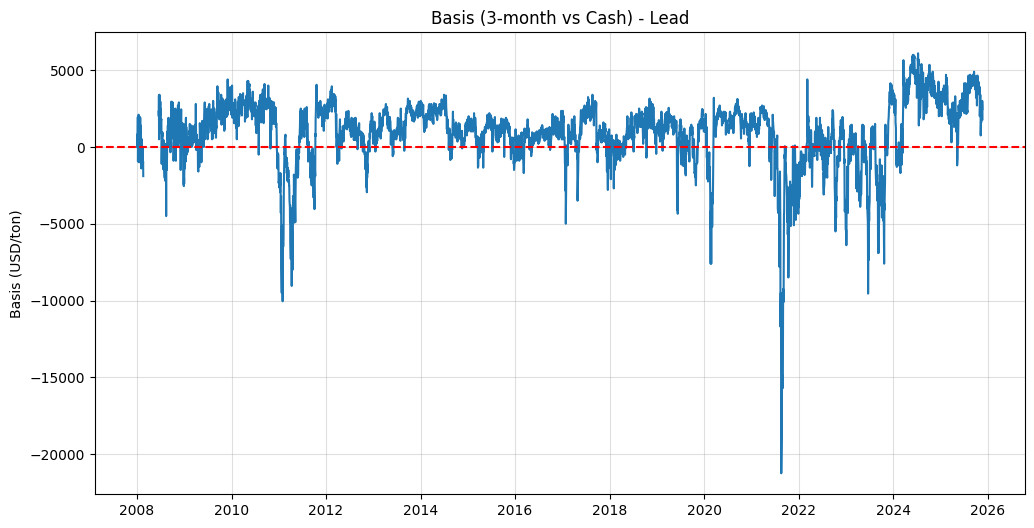

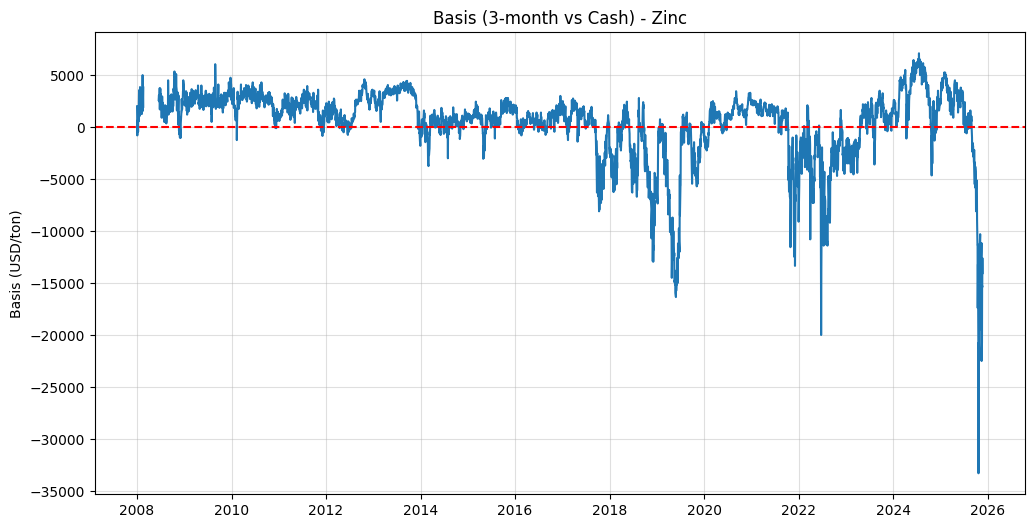

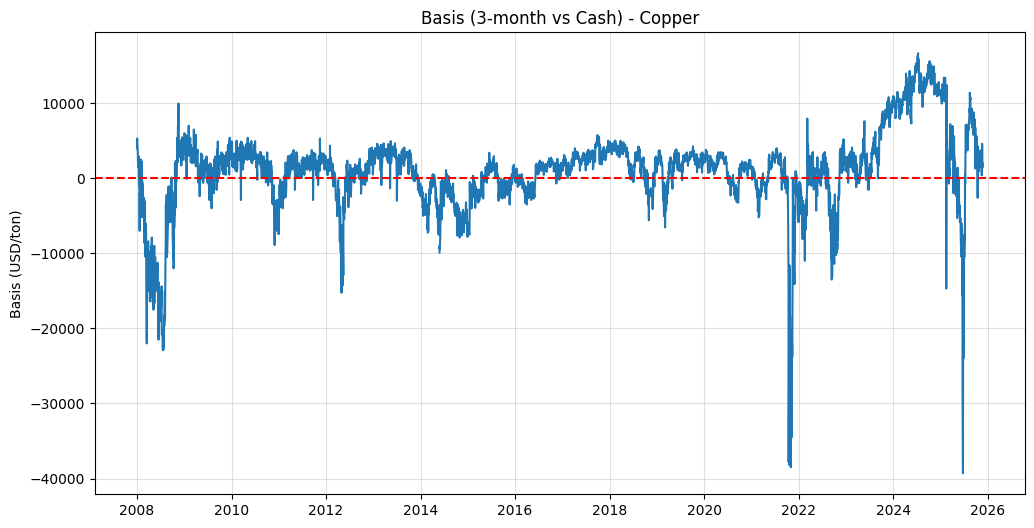

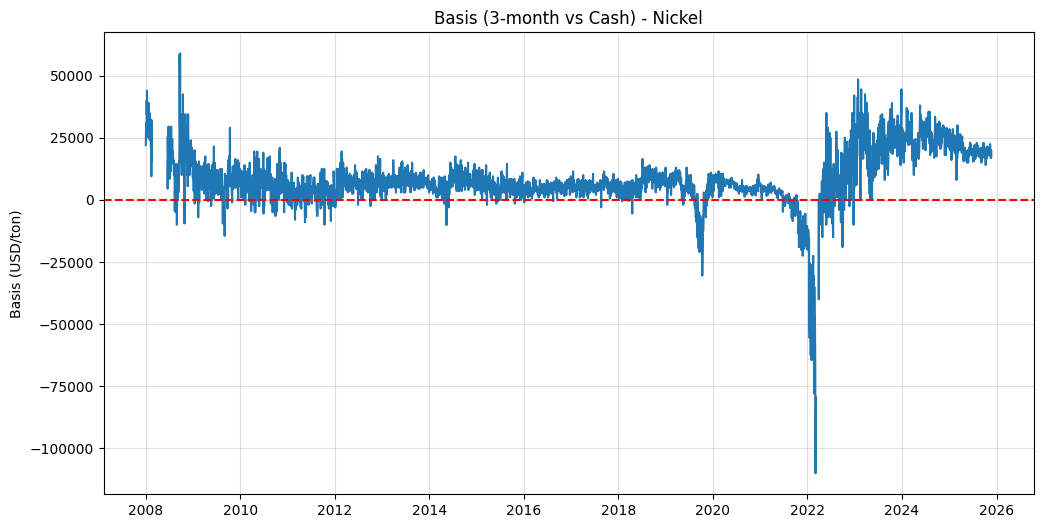

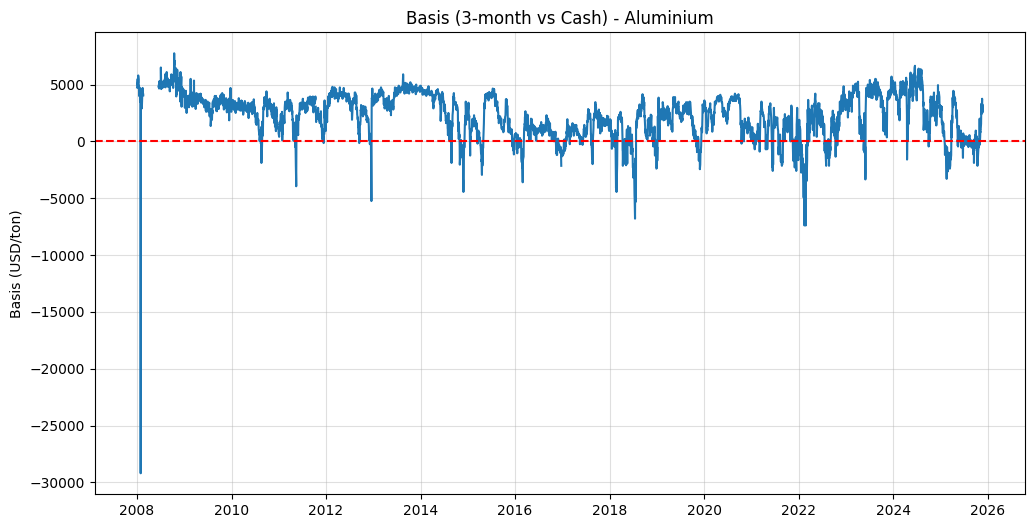

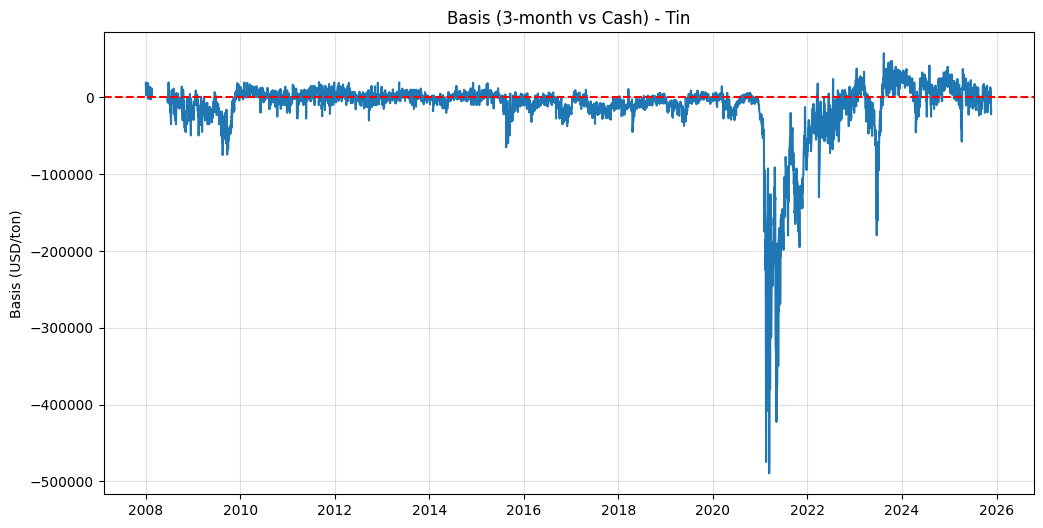

In [8]:
# Gráfico: Linha de basis no tempo
for metal in featured_data.keys():
    df = featured_data[metal]
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['basis'])
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'Basis (3-month vs Cash) - {metal.capitalize()}')
    plt.ylabel('Basis (USD/ton)')
    plt.grid(True, alpha=0.4)
    #plt.savefig(os.path.join(OUTPUT_DIR, f"b_basis_tempo_{metal}.png"), dpi=300)
    plt.show()

A análise do basis (diferença entre o contrato de três meses e o preço à vista) mostra que o mercado alterna entre períodos de contango e backwardation, refletindo mudanças no equilíbrio de oferta e demanda. Em anos em que o basis fica majoritariamente positivo, os metais tendem a operar em contango, indicando oferta relativamente confortável e um mercado mais “normal”, em que o preço futuro incorpora basicamente custos de carregamento e juros. Já nos anos em que o basis se torna negativo com mais frequência, surgem episódios de backwardation, sinalizando aperto de curto prazo: o mercado passa a pagar um prêmio pelo metal disponível imediatamente, o que costuma acontecer em fases de queda de estoque ou choques de produção. Metals como Nickel e Copper apresentam períodos de basis mais volátil, o que sugere maior sensibilidade a choques de oferta, enquanto Aluminium tende a oscilar menos, reforçando sua característica de mercados um pouco mais estáveis.

In [9]:
basis_summary = full_df.groupby(["metal", "year"]).agg(
    basis_medio=("basis", "mean"),
    basis_desvio_padrao=("basis", "std")
).reset_index()

# % dias em contango/backwardation
full_df['contango'] = full_df['basis'] > 0
contango_pct = full_df.groupby(['metal', 'year'])['contango'].mean().rename("pct_contango").reset_index()
basis_summary = basis_summary.merge(contango_pct, on=["metal", "year"])
basis_summary['pct_backwardation'] = 1 - basis_summary['pct_contango']

print("Métricas de Basis por metal e ano:")
basis_summary[basis_summary["metal"] == 'copper']

Métricas de Basis por metal e ano:


,metal,year,basis_medio,basis_desvio_padrao,pct_contango,pct_backwardation
18,copper,2008,-6731.372549,7935.292943,0.262745,0.737255
19,copper,2009,2181.422925,1711.339037,0.905138,0.094862
20,copper,2010,1554.545455,2666.474898,0.822134,0.177866
21,copper,2011,1375.099602,1675.078353,0.824701,0.175299
22,copper,2012,-352.777778,3215.025144,0.630952,0.369048
23,copper,2013,2380.434783,1508.002005,0.905138,0.094862
24,copper,2014,-3375.000000,2354.365700,0.055118,0.944882
25,copper,2015,-758.300395,1940.639488,0.332016,0.667984
26,copper,2016,455.335968,1417.535163,0.629921,0.370079
27,copper,2017,2803.769841,1066.380329,1.000000,0.000000


A tabela resume o comportamento histórico do basis para cada metal, permitindo identificar como o mercado oscilou entre contango e backwardation. O basis_médio mostra a direção predominante da estrutura a termo em cada ano, enquanto o desvio-padrão do basis indica a instabilidade dessa relação. Já os percentuais de contango e backwardation revelam como o mercado passou a maior parte do tempo, indicando anos de oferta mais folgada (contango dominante) ou de estresse de curto prazo (backwardation mais frequente). No conjunto, essas métricas ajudam a identificar períodos de equilíbrio, ruptura e mudanças relevantes na dinâmica de oferta e demanda.

### c) Volatilidade Média

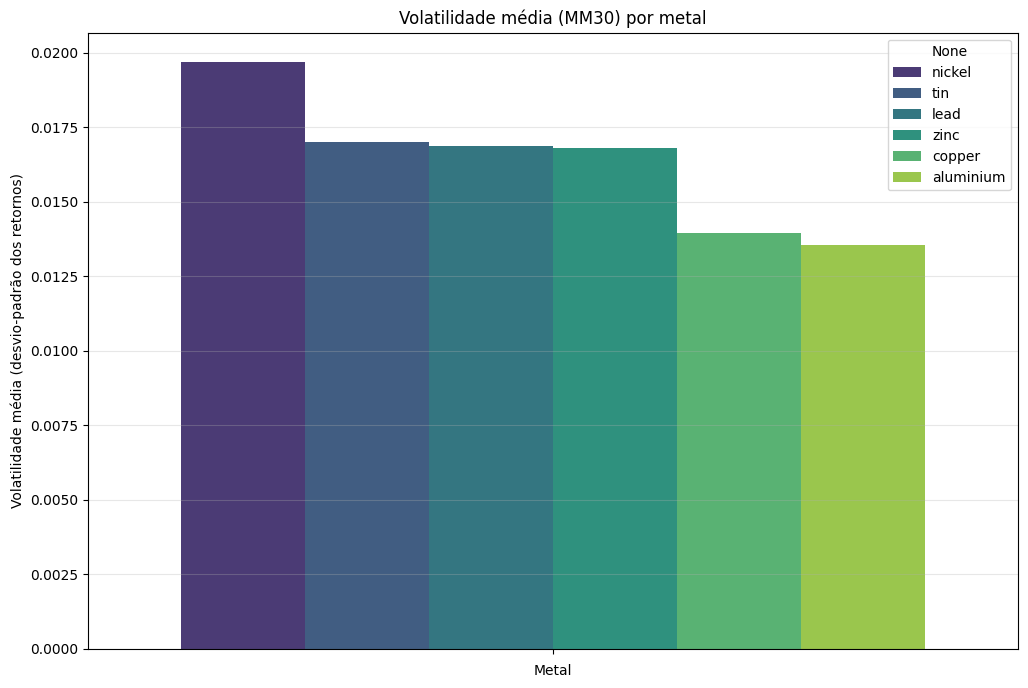

In [10]:
# Dicionário para armazenar a volatilidade média de cada metal
vol_summary_dict = {}

for m in featured_data.keys():
    data_m = featured_data[m]
    # Calcula a média da volatilidade para o metal e armazena no dicionário
    vol_summary_dict[m] = data_m["vol_30d"].mean()

# Cria uma Series a partir do dicionário para facilitar a plotagem
vol_summary = pd.Series(vol_summary_dict).dropna().sort_values(ascending=False)

# Gera o gráfico de barras com todos os metais
plt.figure(figsize=(12, 8))
sns.barplot(hue=vol_summary.index, y=vol_summary.values, palette="viridis")

plt.title("Volatilidade média (MM30) por metal")
plt.xlabel("Metal")
plt.ylabel("Volatilidade média (desvio-padrão dos retornos)")
plt.xticks(rotation=0)
plt.grid(True, axis="y", alpha=0.3)

A comparação da volatilidade média (MM30) mostra que os metais da LME apresentam níveis distintos de risco de preço. Nickel é, de longe, o mais volátil, refletindo um mercado altamente sensível a choques específicos, mudanças regulatórias e eventos idiossincráticos. Na sequência aparecem Tin, Lead e Zinc, que formam um grupo intermediário: voláteis o suficiente para exigir atenção tática, mas ainda com movimentos mais previsíveis que o Nickel. Por fim, Copper e Aluminium exibem as menores volatilidades da amostra, indicando mercados relativamente mais estáveis e adequados para estruturas de hedge e contratos de prazo mais longo. Em conjunto, os resultados mostram que estratégias de gestão de risco precisam ser calibradas metal a metal, já que “risco de preço” não é homogêneo dentro do universo de commodities negociadas na LME.

### d) Estoques vs Preços

Um componente fundamental da dinâmica das commodities é o nível de estoque. Por isso, a análise apresenta no mesmo gráfico a evolução dos estoques na LME e do preço à vista para cada metal. Em muitos casos, surge o padrão clássico: estoques em queda tendem a pressionar os preços para cima, enquanto estoques em alta costumam aliviar o mercado.

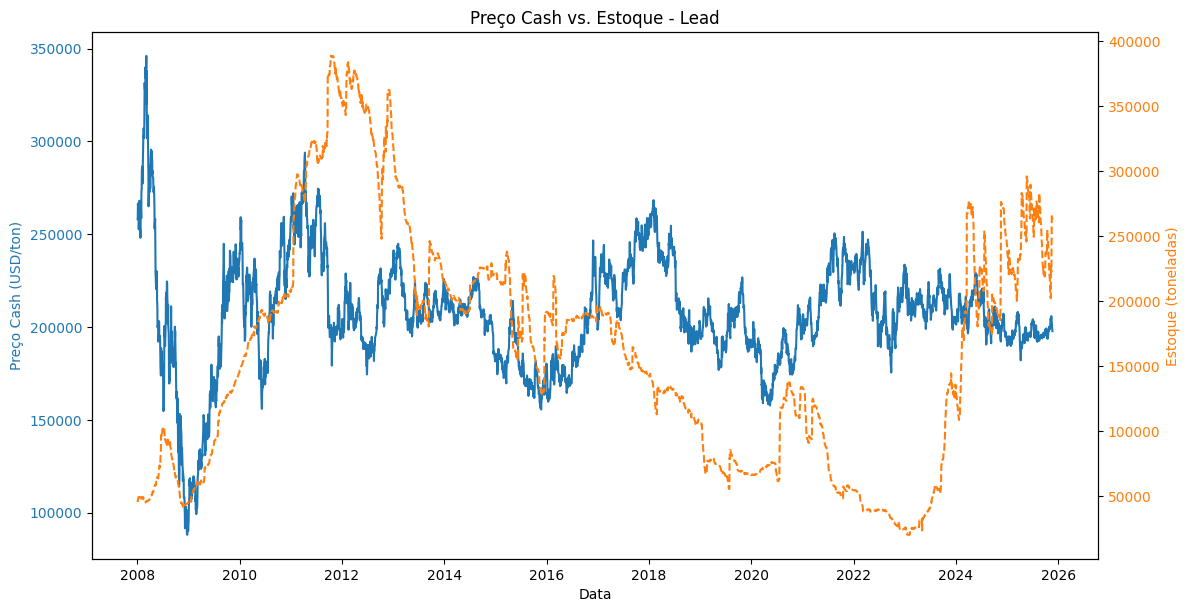

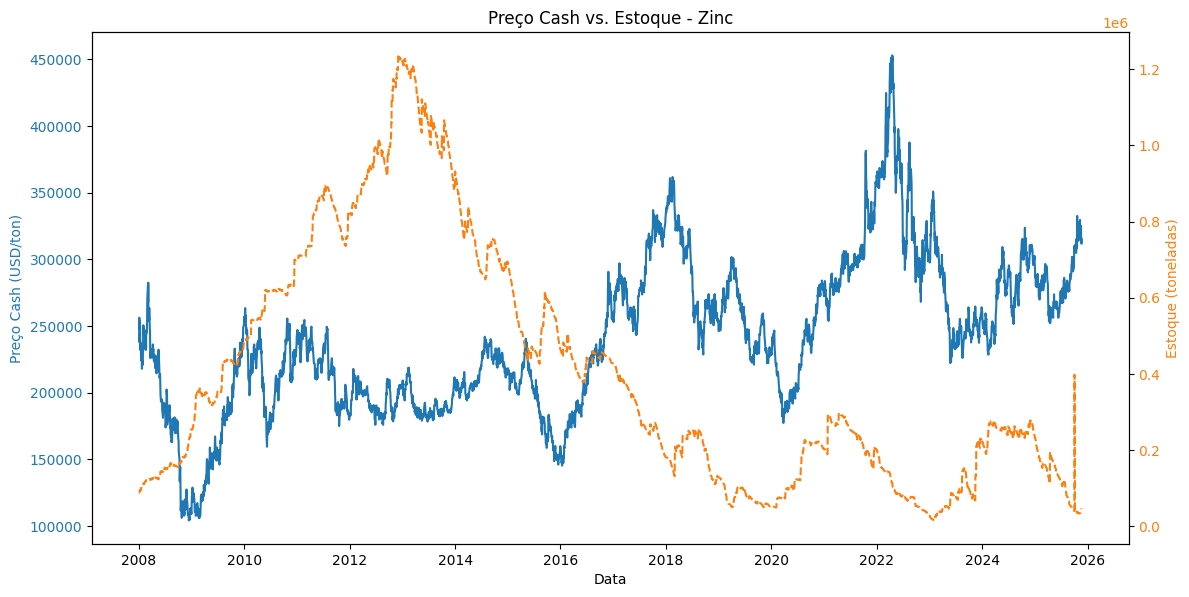

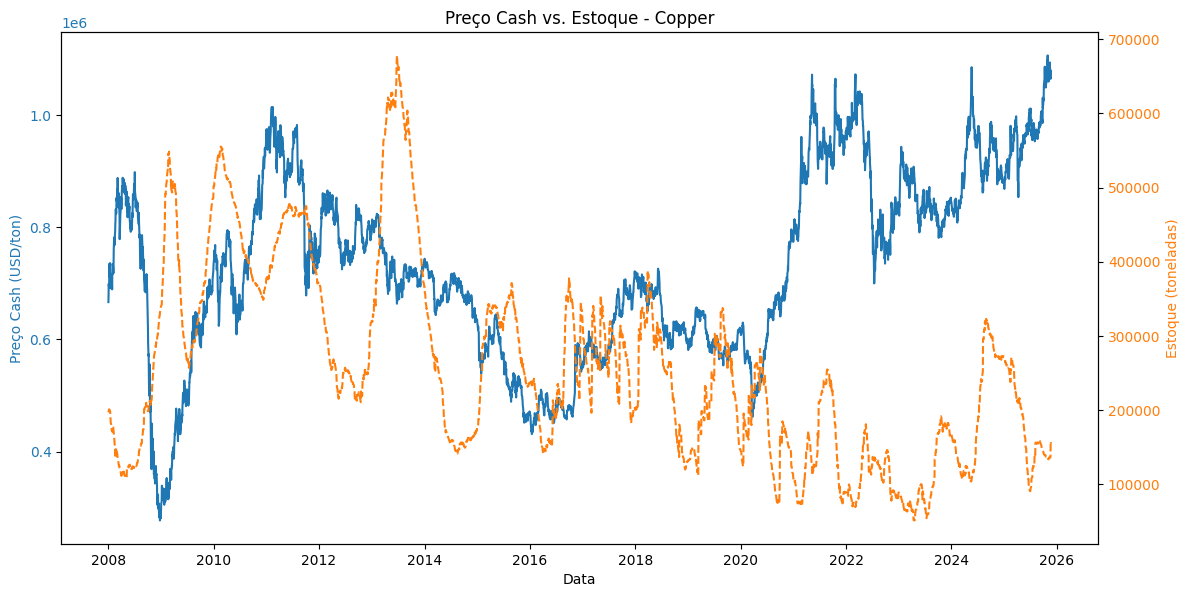

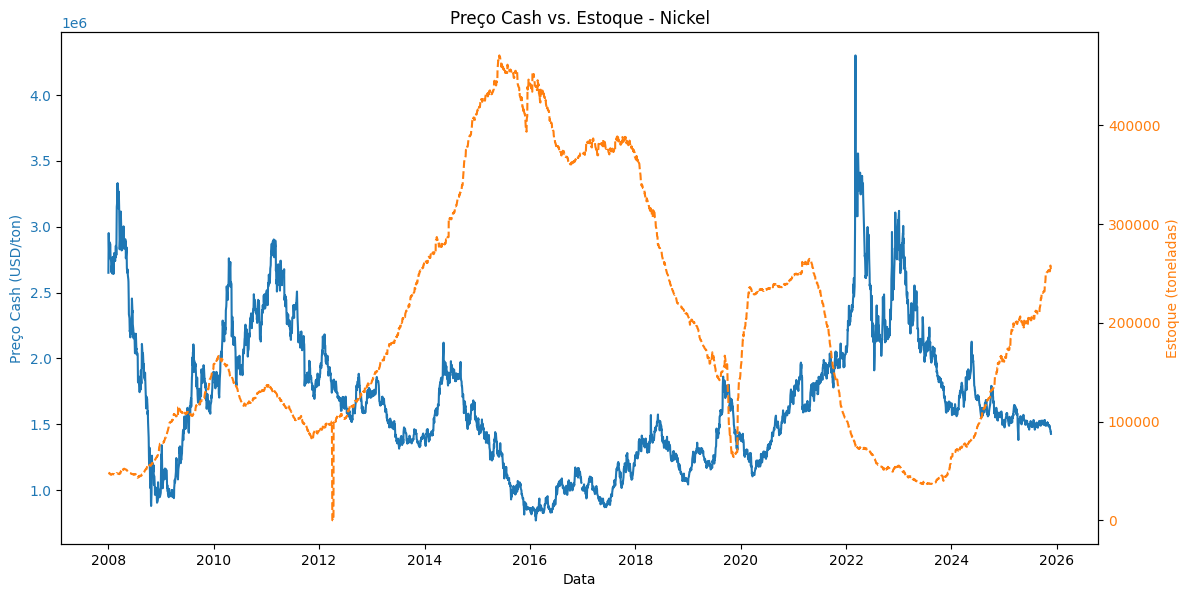

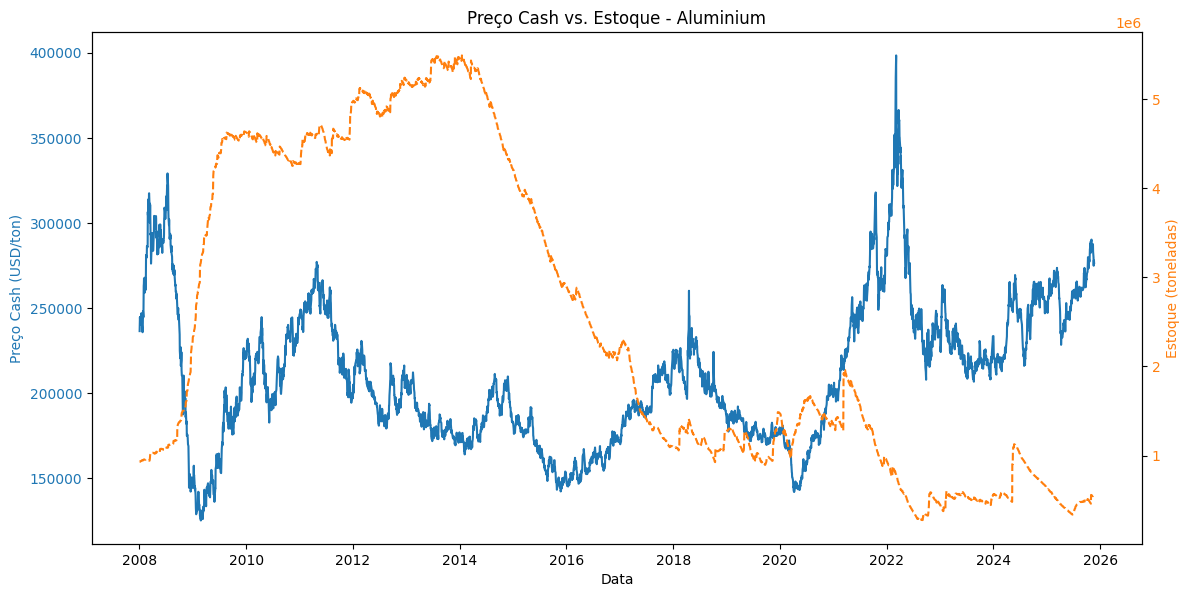

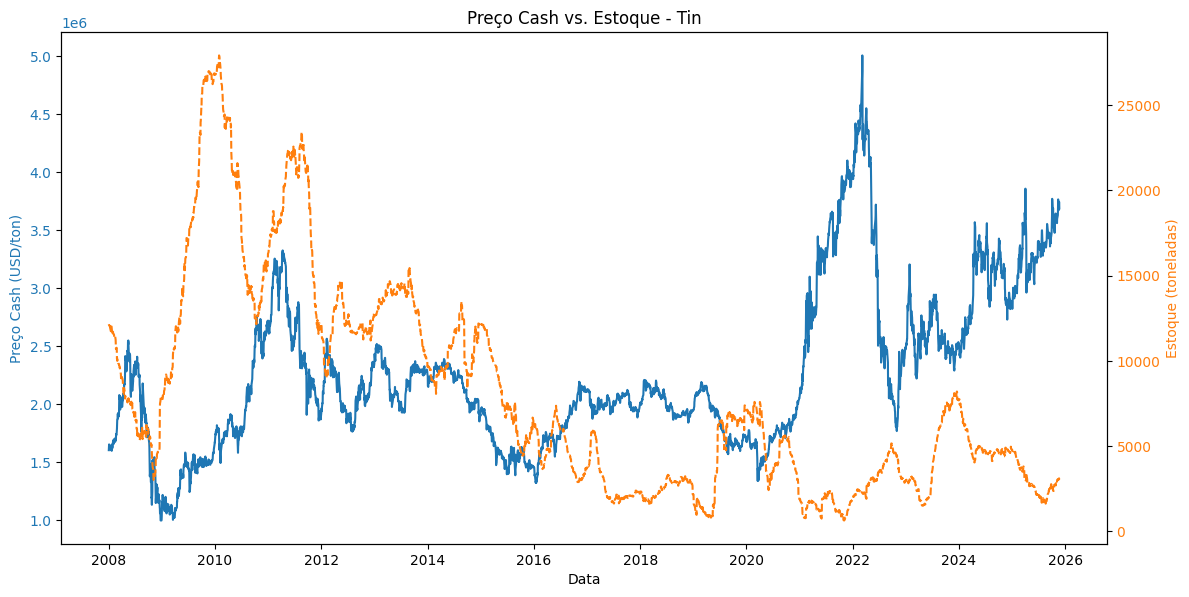

In [11]:
# Gráfico: Série dupla: cash e stock no mesmo eixo de tempo
for metal, df in featured_data.items():
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Data')
    ax1.set_ylabel('Preço Cash (USD/ton)', color='tab:blue')
    ax1.plot(df['date'], df['cash'], color='tab:blue', label='Preço Cash')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Estoque (toneladas)', color='tab:orange')
    ax2.plot(df['date'], df['stock'], color='tab:orange', label='Estoque', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()
    plt.title(f'Preço Cash vs. Estoque - {metal.capitalize()}')
    #plt.grid(True, alpha=0.3)
    #plt.savefig(os.path.join(OUTPUT_DIR, f"c_preco_vs_estoque_{metal}.png"), dpi=300)
    plt.show()

A relação entre estoques e preços é inversa, mas varia em intensidade entre os metais. Aluminium, Lead e Tin mostram essa dinâmica de forma mais clara, enquanto Copper e Zinc respondem de modo mais gradual ou defasado. Já o Nickel apresenta comportamento menos previsível, com choques específicos que muitas vezes se sobrepõem ao efeito dos estoques. Ainda assim, movimentos prolongados de queda ou alta dos estoques funcionam como um bom sinalizador do regime de oferta: estoques em queda sugerem aperto e maior volatilidade; recomposição indica alívio. Assim, acompanhar a tendência dos estoques ajuda a antecipar condições de mercado e orientar decisões de compra, venda ou hedge.

## Resumo das análises

* Entre 2008 e 2025, as commodities metálicas da LME apresentaram padrões distintos de preço e volatilidade, com ciclos claros de expansão (pós-2020) e contração (2008 e 2015).
* Nickel e Tin se destacam pela alta volatilidade estrutural, tornando-se mais sensíveis a choques externos, enquanto Aluminium e Lead exibem comportamento mais estável.
* A análise da estrutura a termo (basis) revela alternância entre contango e backwardation, refletindo tensões de oferta e demanda — sendo backwardation um forte sinal de aperto de curto prazo.
* A relação estoques × preços permanece consistentemente inversa, indicando que movimentos nos inventários da LME são um dos melhores preditores de risco de preço.
* Os achados reforçam a importância de monitoramento contínuo, gestão ativa de risco e estratégias de hedge adaptadas a cada metal.

## Recomendação Stakeholders

Com base nessas evidências, a principal recomendação aos stakeholders é adotar uma gestão ativa e segmentada por metal, em vez de tratar todo o grupo como uma única classe de risco. Para compradores industriais, faz sentido priorizar contratos mais longos e mecanismos de hedge em metais estruturalmente mais voláteis (especialmente Nickel e Tin), combinando isso com um monitoramento sistemático de estoques e da estrutura a termo (contango/backwardation) para ajustar momentos de compra. Produtores e traders, por sua vez, podem usar a leitura conjunta de basis, volatilidade e estoques para identificar janelas de oportunidade: épocas de backwardation e estoques em queda tendem a favorecer quem já está estocado, enquanto fases de contango e estoques crescentes indicam ambiente mais competitivo e margens comprimidas. Em comum a todos os perfis, o recado é o mesmo: decisões mais informadas virão de um acompanhamento contínuo desses indicadores, com dashboards simples que permitam enxergar rapidamente se o mercado está entrando em um regime de aperto, normalidade ou alívio de oferta.